In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import requests 
from bs4 import BeautifulSoup
import time
warnings.filterwarnings("ignore", category=UserWarning, module='urllib3')

In [8]:
df = pd.read_csv('stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Sector,Industry,Adj Close
0,2020-03-02 00:00:00-05:00,68.503432,73.153162,67.396816,72.514915,341397200.0,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
1,2020-03-03 00:00:00-05:00,73.694344,73.774425,69.357664,70.211899,319475600.0,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
2,2020-03-04 00:00:00-05:00,71.939753,73.628797,71.136487,73.468628,219178400.0,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
3,2020-03-05 00:00:00-05:00,71.716493,72.694489,70.719085,71.085533,187572800.0,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN
4,2020-03-06 00:00:00-05:00,68.435477,70.575907,68.248617,70.141510,226176800.0,0.0,0.0,AAPL,Technology,Consumer Electronics,NaN


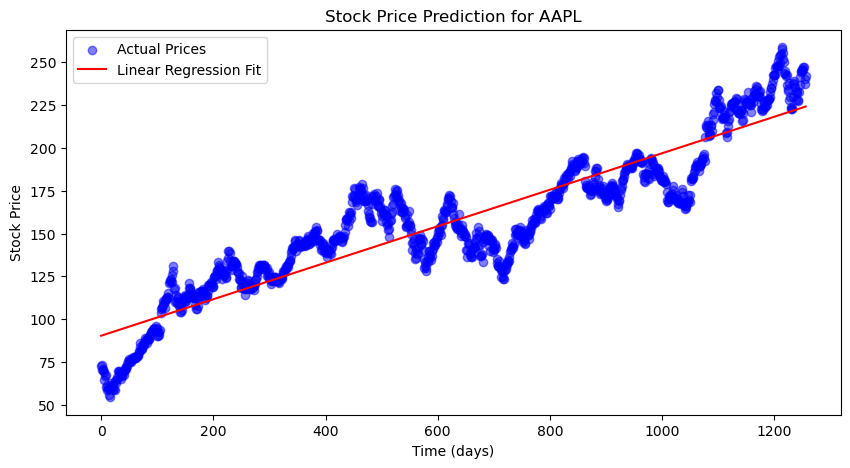

In [ ]:
#doing it on aapl stock for now
data = df[df['Ticker'] == 'AAPL'].copy()


data['Date'] = np.arange(len(data))  

#basic linear regression model
def linear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]  
    theta = np.linalg.inv(X.T @ X) @ X.T @ y  
    return theta


X = data['Date'].values.reshape(-1, 1)
y = data['Close'].values.reshape(-1, 1)

#train
theta = linear_regression(X, y)

#predict
y_pred = np.c_[np.ones(X.shape[0]), X] @ theta


plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Actual Prices', color='blue', alpha=0.5)
plt.plot(X, y_pred, label='Linear Regression Fit', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Prediction for {df["Ticker"].iloc[0]}')
plt.legend()
plt.show()
